<a href="https://colab.research.google.com/github/emerson-matos/tcc-notebooks/blob/main/tcc_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monta o google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Dados dos hoteis

In [2]:
date = "2023/02/15"

## Cria o DataFrame

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
df = pd.read_csv("/content/gdrive/MyDrive/tcc/data/2023/02/15/aram-beach-&-convention-gm-reviews.csv")
df['source'] = 'aram-beach-&-convention-gm-reviews.csv'
df[:1]
df.shape[0]

2679

In [4]:
import pandas as pd
import glob
import os
pd.set_option('display.max_colwidth', None)
path_to_lookup = f'/content/gdrive/MyDrive/tcc/data/{date}/'
file_pattern = "*.csv"

# setting the path for joining multiple files
files = os.path.join(path_to_lookup, file_pattern)

# list of merged files returned
files = glob.glob(files)

df = pd.concat(map(lambda file: pd.read_csv(file).assign(source=file.split("/")[-1]), files), ignore_index=True)
df.shape[0]

332721

In [5]:
df[['text']].describe()

,text
count,209946
unique,170392
top,Muito bom
freq,2773


In [6]:
df = df.loc[df['text'].notna()]
df = df.loc[df['text'].str.contains('(Tradução do Google)') == False]
df.shape[0]

<ipython-input-6-57619e912415>:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df = df.loc[df['text'].str.contains('(Tradução do Google)') == False]


189300

In [7]:
df[['source', 'rating']].groupby(['source']).size().reset_index(name='counts').sort_values("counts", ascending=False)

,source,counts
52,pratagy-beach-all-inclusive-resort-maceió---wyndham-gm-reviews.csv,18839
14,grand-palladium-imbassaí-resort-&-spa-gm-reviews.csv,11712
5,costão-do-santinho-resort-all-inclusive-gm-reviews.csv,9373
41,iberostar-bahia-gm-reviews.csv,8489
60,sauípe-premium-brisa---all-inclusive-gm-reviews.csv,7426
...,...,...
7,dan-inn-são-paulo-higienópolis-gm-reviews.csv,598
42,iberostar-grand-amazon-gm-reviews.csv,570
24,hotel-beira-mar-gm-reviews.csv,378
17,hotel-atlântico-avenida-gm-reviews.csv,378


In [8]:
df.describe()

,rating,rating_max,user_photos
count,189300.000000,189300.0,104469.000000
mean,4.396577,5.0,66.649999
std,1.102328,0.0,139.549764
min,1.000000,5.0,1.000000
25%,4.000000,5.0,3.000000
50%,5.000000,5.0,13.000000
75%,5.000000,5.0,55.000000
max,5.000000,5.0,999.000000


In [9]:
from datetime import datetime, timedelta, date
import re

def obtem_data(row):
  
  # String de data relativa
  data_relativa_str = row.relative_date
  timestamp = row.retrieval_date
  
  # Converte a string em um objeto timedelta
  unidade_tempo = data_relativa_str.split()[1]
  quantidade_tempo = 1 if 'um' in data_relativa_str.split()[0] else int(data_relativa_str.split()[0])

  if 'segundo' in unidade_tempo:
      data_relativa = timedelta(seconds=quantidade_tempo)
  elif 'minuto' in unidade_tempo:
      data_relativa = timedelta(minutes=quantidade_tempo)
  elif 'hora' in unidade_tempo:
      data_relativa = timedelta(hours=quantidade_tempo)
  elif 'dia' in unidade_tempo:
      data_relativa = timedelta(days=quantidade_tempo)
  elif 'semana' in unidade_tempo:
      data_relativa = timedelta(weeks=quantidade_tempo)
  elif re.match(r"m(ê|e)s", unidade_tempo):
      data_relativa = timedelta(days=30*quantidade_tempo)
  elif 'ano' in unidade_tempo:
      data_relativa = timedelta(days=365*quantidade_tempo)
  else:
      return timestamp

  # Timestamp
  try:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
  except:
    dt_timestamp = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')
  
  return (dt_timestamp - data_relativa).date()

df['data_avaliacao'] = df.apply(obtem_data, axis=1)
df['ano_avaliacao'] = df['data_avaliacao'].apply(lambda x: x.year)
df['user_is_local_guide'] = df['user_is_local_guide'].apply(lambda x: bool(x))

df[['ano_avaliacao','data_avaliacao', 'relative_date', 'retrieval_date', 'user_is_local_guide']].head()

,ano_avaliacao,data_avaliacao,relative_date,retrieval_date,user_is_local_guide
0,2023,2023-02-15,2 horas atrás,2023-02-15 02:48:01.831814,True
1,2023,2023-02-14,12 horas atrás,2023-02-15 02:48:01.836818,True
2,2023,2023-02-14,16 horas atrás,2023-02-15 02:48:01.839825,True
3,2023,2023-02-14,um dia atrás,2023-02-15 02:48:01.842919,False
4,2023,2023-02-14,um dia atrás,2023-02-15 02:48:01.847158,False


<AxesSubplot:xlabel='rating', ylabel='count'>

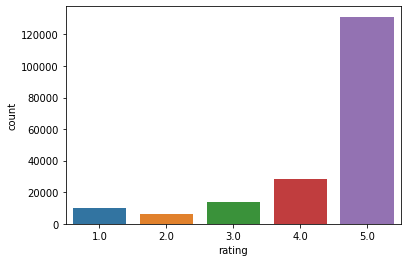

In [10]:
import seaborn as sns

sns.countplot(x="rating", data=df)

In [11]:
teste = df[['rating', 'text', 'ano_avaliacao', 'user_is_local_guide', 'user_reviews', 'source', 'data_avaliacao']]

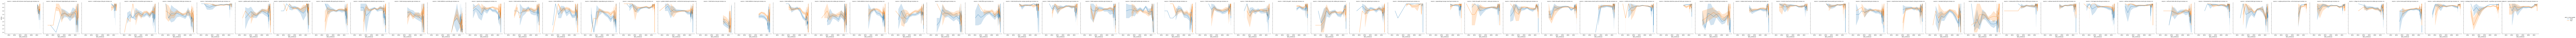

In [12]:
sns.relplot(x='data_avaliacao', y='rating', col='source', hue='user_is_local_guide',
    kind="line", data=teste)

In [ ]:
sns.displot(x='data_avaliacao', col='source', kind="hist", hue='user_is_local_guide', data=teste)

In [ ]:
sns.relplot(x='ano_avaliacao', y='rating', kind="line", data=teste)

In [ ]:
sns.countplot(x="ano_avaliacao", data=teste, dodge= True, hue='rating')

In [ ]:
df_plot = teste.groupby(['ano_avaliacao', 'rating']).size().reset_index().pivot(columns='rating', index='ano_avaliacao', values=0)
df_plot.plot(kind='bar', stacked=True)

# WordCloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

In [ ]:
documento = ' '.join(teste['text']).lower()
words = documento.split()
stop_words = set(stopwords.words('portuguese'))
wc = WordCloud(width=800, height=400,
               background_color='white',
               collocations = False,
               stopwords=stop_words).generate(' '.join(words))

In [ ]:
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
sns.relplot(x='ano_avaliacao', y='rating', kind="line", data=teste.query('data_avaliacao > 2022-01-01'))

In [ ]:
mais_recentes = teste.loc[teste['data_avaliacao'] >= date(2023, 1, 1)]

mais_recentes['data_avaliacao'].unique()

In [ ]:
sns.relplot(x='data_avaliacao', y='rating', kind="line", data=mais_recentes)

In [ ]:
traducoes = teste.loc[teste['text'].str.contains('tradução')]

traducoes.describe()

In [ ]:
teste.loc[traducoes.index]

In [ ]:
teste.iloc[204598]['text']

In [ ]:
traducoes = teste.loc[teste['text'].str.contains('(Tradução do Google)')]

traducoes.describe()

In [ ]:
traducoes